# Spettroscopia Alpha - Template di analisi

Esempio di codice per leggere i files binari creati scritti dal Red Pitaya e salvati in formato binario. Un riferimento [qui](https://scarsi.web.cern.ch/INSULAB/RedPitaya/ade2ascii.html)

In [1]:
# Importo le librerie necessarie

import struct
import os
import sys

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Definisco la struttura dei dati binari - Don't care about it

myEvent = np.dtype([
    ('timestamp', np.dtype('u8')),
    ('qshort', np.dtype('u2')),
    ('qlong', np.dtype('u2')),
    ('baseline', np.dtype('u2')),
    ('channel', np.dtype('u1')),
    ('PUR', np.dtype('u1')),
])

# Load dei dati
Definisco il file da caricare. I dati sono stati montati via `sshfs`, typando dalla cartella `~/Desktop/datiRutherford`
```bash
sshfs -o ro root@dhcp-117-cast:/root/abcd/data/202211Miniscuola/ .
```

Essendo files binari possono essere letti anche a run in corso senza problemi

In [3]:
fileToRead = "datiRutherford/provaMattina_events.ade"

with open(fileToRead, "rb") as f:
    myData = np.fromfile(f, dtype = myEvent)

# Istogramma e plot
Dopo aver caricato i dati, per prima cosa effettuo l'istogramma. L'ampiezza del segnale, la cosiddetta _Pulse Height_ si trova all'interno del campo `qlong`.

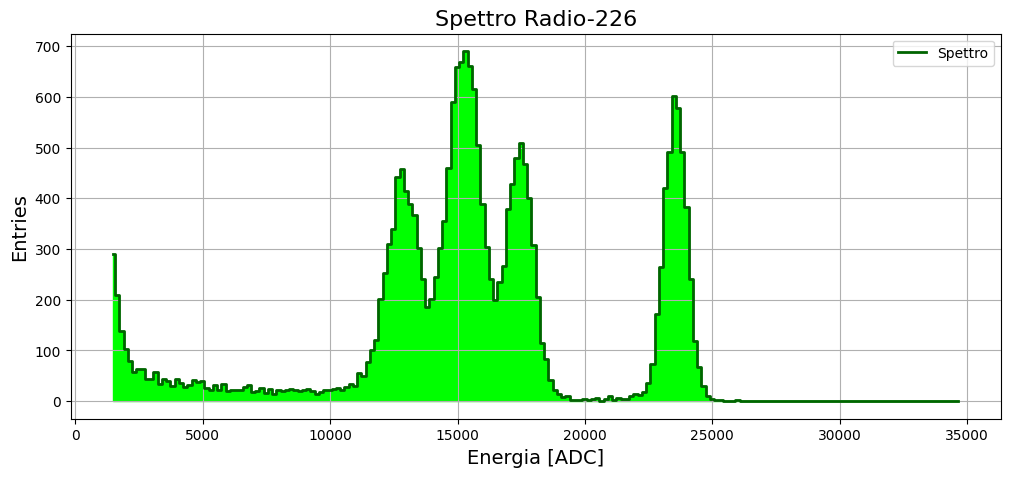

In [4]:
# Istogramma
h, bins = np.histogram(myData["qlong"], bins = 200)
binc = bins[:-1] + (bins[1] - bins[0])/2


# Definisco la figura
fig, ax = plt.subplots()
fig.set_size_inches(12,5)

# Plot dei dati
ax.plot(binc, h, ds = "steps-mid", c = "darkgreen", lw = 2, label = "Spettro")
ax.fill_between(binc, h, step = "mid", color = "lime", alpha = 1)

# Un po' di abbellimenti al grafico
ax.grid()
ax.set_xlabel("Energia [ADC]", fontsize = 14)
ax.set_ylabel("Entries", fontsize = 14)
ax.set_title(f"Spettro Radio-226", fontsize = 16)
ax.legend()

# Mostro la figura
plt.show()

In [5]:
print(f"Sono stati acquisiti {myData['qlong'].shape[0]} eventi")

# Il timestamp non è unix, ma è in unita di tick interni (125MHz --> 8ns)
durata = (myData['timestamp'][-1] - myData['timestamp'][0])*(8e-9)
print(f"L'acquisizione è durata {durata:.2f} secondi")

Sono stati acquisiti 21881 eventi
L'acquisizione è durata 1523.20 secondi
